In [81]:
# Zitane_Smail
# import required lybraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pickle

In [11]:
current_dir = os.getcwd()
dataset_path = os.path.join(current_dir,"BostonHousing.csv")

In [12]:
dataset = pd.read_csv(dataset_path)

In [15]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
# keep important feautures
filtred_dataset = dataset.drop(['crim','zn','indus','nox','chas','age','dis','rad','tax','b'], axis=1)
filtred_dataset.head()

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [25]:
#Separate target and features those impact it 
X = filtred_dataset.drop(['medv'],axis=1)
y = filtred_dataset['medv']

In [29]:
# Split train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [53]:
type(X_test)

pandas.core.frame.DataFrame

In [33]:
X_train.shape,X_test.shape

((303, 3), (203, 3))

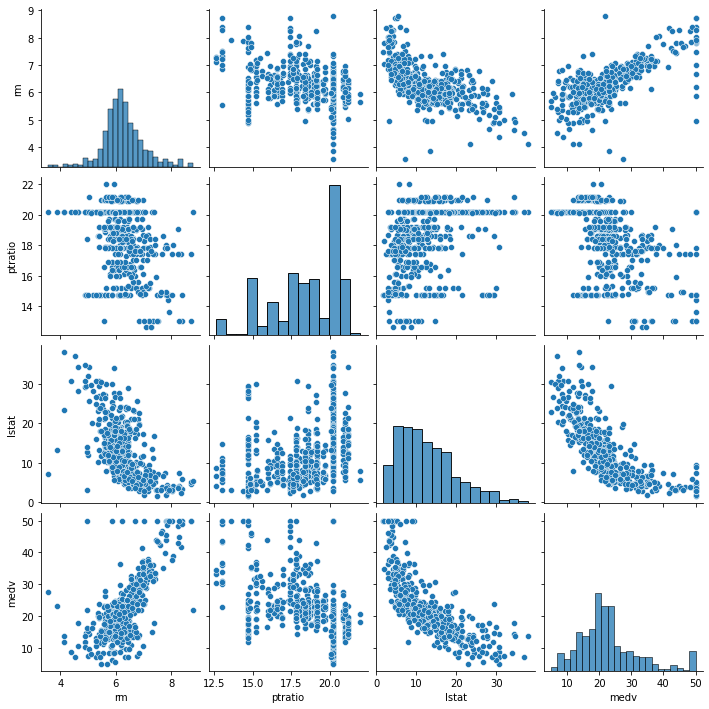

In [36]:
# some userful graphic to see feautures distibution and have some good idea about each feature
sns.pairplot(filtred_dataset)

<AxesSubplot:>

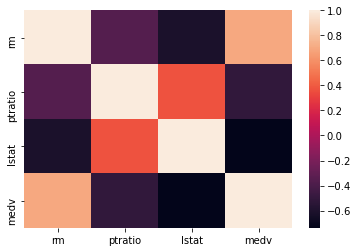

In [37]:
# correlation between varuiables
sns.heatmap(filtred_dataset.corr())

In [45]:
# Define our model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7211557008079652

In [85]:
# save the model to disk
filename = 'BostonHousePricing.sav'
pickle.dump(model, open(filename, 'wb'))

In [48]:
# Define function to predcit the target
def predict(model, rm, ptradio, lstat):
    x = np.array([rm ,ptradio, lstat]).reshape(1,3)
    return model.predict(x)[0]

In [83]:
# load the model
loaded_model = pickle.load(open(filename, 'rb'))

In [86]:
predict(loaded_model, 5.093, 20.1, 29.68)

5.96317712656829

In [74]:
# function to compare between the real values and those estimated by our model
import sys

def compare(model, y_test):
    compare = []
    for index, row in X_test.iterrows():
        predicted_value = predict(model, row['rm'] ,row['ptratio'], row['lstat'])
        difference = np.abs(predicted_value - y_test[index])
        x = { 'Predicted_value' : predicted_value , 'real_value' :  y_test[index], 'difference' : int(difference) }
        compare.append(x)
    return compare
        

In [76]:
eva = pd.DataFrame(compare(model, y_test))

In [77]:
eva.head()

,Predicted_value,real_value,difference
0,22.801358,24.0,1
1,33.193817,39.8,6
2,20.497445,19.3,1
3,15.033355,16.1,1
4,21.405642,19.7,1


C:\Users\Original Shop\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='difference', ylabel='Density'>

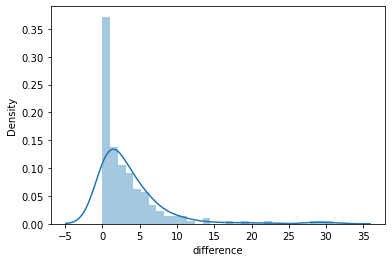

In [78]:
# see the different values of difference that we have
sns.distplot(eva["difference"], bins=30)


<AxesSubplot:xlabel='difference', ylabel='real_value'>

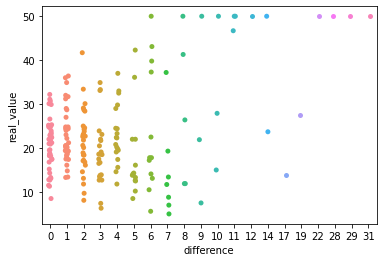

In [80]:
# we can see the majority of predicted has small difference
sns.stripplot(x="difference", y="real_value", data=eva)

In [ ]:
from flask import Flask,request
import pickle

app = Flask(__name__)

@app.route('/', methods=['GET'])
def index():
    try:
        filename = 'BostonHousePricing.sav'
        loaded_model = pickle.load(open(filename, 'rb'))
        rm ,ptratio, lstat = request.args.get('rm'), request.args.get('ptratio'), request.args.get('lstat')
        x = np.array([rm, ptratio, lstat]).reshape(1,3)
        return str(loaded_model.predict(x)[0])
    except Exception as ex:
        return str(ex)
    #return 'works'


if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
C:\Users\Original Shop\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
127.0.0.1 - - [09/Oct/2021 19:46:02] "GET /?rm=5.093&ptratio=20&lstat=31 HTTP/1.1" 200 -
127.0.0.1 - - [09/Oct/2021 19:46:05] "GET /?rm=5.093&ptratio=20 HTTP/1.1" 200 -
C:\Users\Original Shop\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
127.0.0.1 - - [09/Oct/2021 19:46:14] "GET /?rm=5.093&ptratio=20